<a href="https://colab.research.google.com/github/20sunil/20sunil/blob/main/purchase_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
df=pd.read_csv("purc.csv")
print(df.describe())
print(df.head())
print(df.info())

       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [17]:
print(df.duplicated().sum())

0


In [18]:
print(df.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [20]:
print(df['LYLTY_CARD_NBR'].dtype)
print(df['LIFESTAGE'].dtype)
print(df['PREMIUM_CUSTOMER'].dtype)

int64
object
object


In [29]:
q1=df['LYLTY_CARD_NBR'].quantile(0.25)
q3=df['LYLTY_CARD_NBR'].quantile(0.75)
irq=q3-q1
df=df[(df['LYLTY_CARD_NBR']>q1-1.5*irq) & (df['LYLTY_CARD_NBR']<q3+1.5*irq)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 72603 entries, 0 to 72602
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72603 non-null  int64 
 1   LIFESTAGE         72603 non-null  object
 2   PREMIUM_CUSTOMER  72603 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB
None


In [31]:
customer_segment_count = df['LIFESTAGE'].value_counts()
premium_split = df['PREMIUM_CUSTOMER'].value_counts()
print(premium_split)
print(customer_segment_count)

PREMIUM_CUSTOMER
Mainstream    29233
Budget        24454
Premium       18916
Name: count, dtype: int64
LIFESTAGE
RETIREES                  14798
OLDER SINGLES/COUPLES     14599
YOUNG SINGLES/COUPLES     14436
OLDER FAMILIES             9776
YOUNG FAMILIES             9173
MIDAGE SINGLES/COUPLES     7272
NEW FAMILIES               2549
Name: count, dtype: int64


In [34]:
segment_analysis = df.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', aggfunc='size', fill_value=0)
print(segment_analysis)

PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1503        3339     2430
NEW FAMILIES              1112         849      588
OLDER FAMILIES            4671        2831     2274
OLDER SINGLES/COUPLES     4925        4927     4747
RETIREES                  4450        6477     3871
YOUNG FAMILIES            4015        2726     2432
YOUNG SINGLES/COUPLES     3778        8084     2574


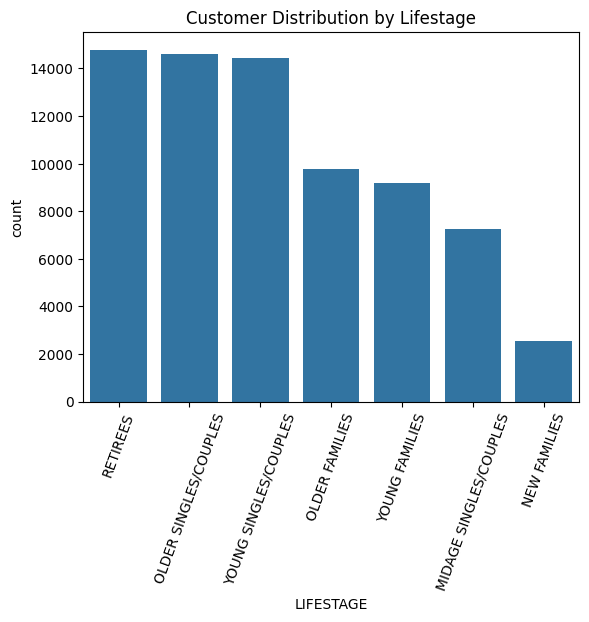

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='LIFESTAGE', order=df['LIFESTAGE'].value_counts().index)
plt.title('Customer Distribution by Lifestage')
plt.xticks(rotation=70)
plt.show()



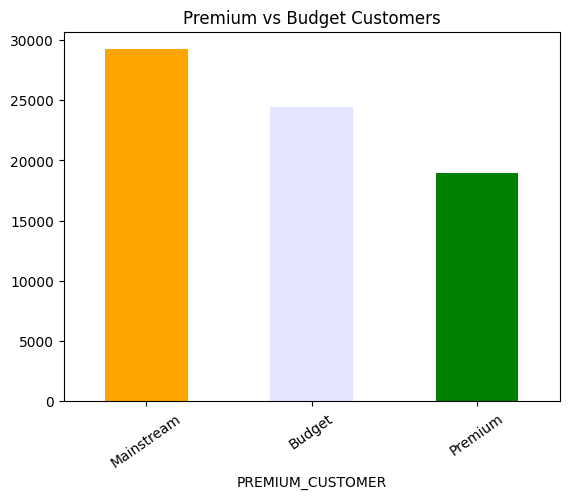

In [50]:
ax=premium_split.plot(kind='bar', color=['orange','blue','green'])
ax.patches[1].set_alpha(0.1)
plt.title('Premium vs Budget Customers')
plt.xticks(rotation=35)
plt.show()

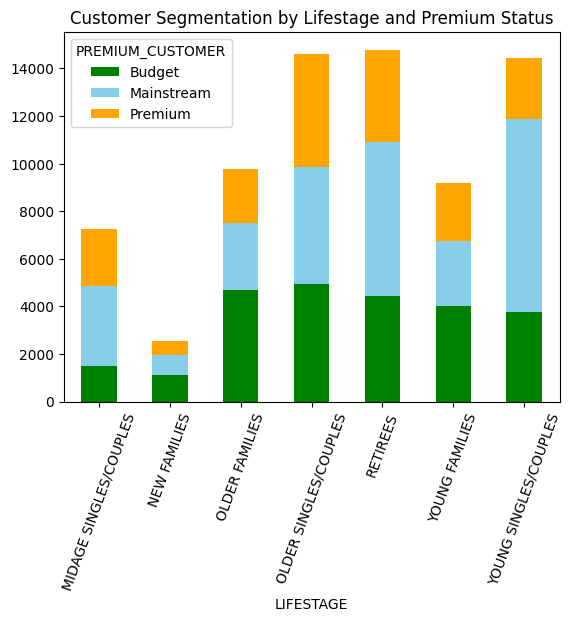

In [56]:
segment_analysis.plot(kind='bar', stacked=True, color=['green','skyblue','orange'])

plt.title('Customer Segmentation by Lifestage and Premium Status')
plt.xticks(rotation=70)
plt.show()


